# An Analysis of Wine Production, Consumption, Ratings and Price

### Part I - Historical Data Analyses
* Global Production and Consumption vs. Population Growth
* Historical Production, Export and Consumption for the top 10 producers in 2016
* Focus on the US

### Part II - Analyses of Ratings, Varieties, Origin and Price
* Blah
* Blah
* Blah
* Blah


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas import ExcelWriter
from pandas import ExcelFile

### Part I - Historical Data Analyses
-Database source: Anderson, K. and V. Pinilla (with the assistance of A.J. Holmes), Annual Database of Global Wine Markets, 1835 to 2016, freely available in Excel at the University of Adelaide’s Wine Economics Research Centre, November 2017 www.adelaide.edu.au/wine-econ/databases/global-wine-history

#### The source file has over 100 sheets. For this study we used:
* T6 Volume of wine production
* T8 Volume of wine production per capita
* T10 Volume of wine exports
* T12 Volume of wine exports per capita
* T15 Volume of wine imports
* T17 Volume of wine imports per capita
* T58 Population

In [2]:
# Read each sheet into a dataframe and output a clean excel file
# Cleanup included naming the year column and skipping the first row (sheet title)
# The dataframes follow the source data codes (T6, T10, etc.) described above.

file = '../data/rawdata/Megafile_of_global_wine_data_1835_to_2016_1217.xlsx'

T6_df = pd.read_excel(file, sheet_name='T6 Wine production', skiprows=1) # 1st row is sheet title, 2nd is column header
T6_df.rename(columns={'Unnamed: 0': 'Year'}, inplace=True) # 1st col is year, but has no header, thus renaming here

T8_df = pd.read_excel(file, sheet_name='T8 Wine prodn per capita', skiprows=1)
T8_df.rename(columns={'Unnamed: 0': 'Year'}, inplace=True)

T10_df = pd.read_excel(file, sheet_name='T10 Wine export vol', skiprows=1)
T10_df.rename(columns={'Unnamed: 0': 'Year'}, inplace=True)

T15_df = pd.read_excel(file, sheet_name='T15 Wine import vol', skiprows=1)
T15_df.rename(columns={'Unnamed: 0': 'Year'}, inplace=True)

T17_df = pd.read_excel(file, sheet_name='T17 Wine imports per capita', skiprows=1)
T17_df.rename(columns={0: 'Year'}, inplace=True) # The year column had a zero for the header

T34_df = pd.read_excel(file, sheet_name='T34 Wine consumption vol', skiprows=1)
T34_df.rename(columns={'Unnamed: 0': 'Year'}, inplace=True)

T38_df = pd.read_excel(file, sheet_name='T38 Wine consumption per capita', skiprows=1)
T38_df.rename(columns={'Unnamed: 0': 'Year'}, inplace=True)

T58_df = pd.read_excel(file, sheet_name='T58 Population', skiprows=1) 
T58_df.rename(columns={'Unnamed: 0': 'Year'}, inplace=True) 

# Write the clean file to excel
writer = pd.ExcelWriter('../data/cleandata/Global_wine_data_clean_select_sheets.xlsx')
T6_df.to_excel(writer,'T6 Wine production',index=False)
T8_df.to_excel(writer,'T8 Wine prodn per capita',index=False)
T10_df.to_excel(writer,'T10 Wine export vol',index=False)
T15_df.to_excel(writer,'T15 Wine import vol',index=False)
T17_df.to_excel(writer,'T17 Wine imports per capita',index=False)
T34_df.to_excel(writer,'T34 Wine consumption vol',index=False)
T38_df.to_excel(writer,'T38 Wine consumption per capita',index=False)
T58_df.to_excel(writer,'T58 Population',index=False)
writer.save()


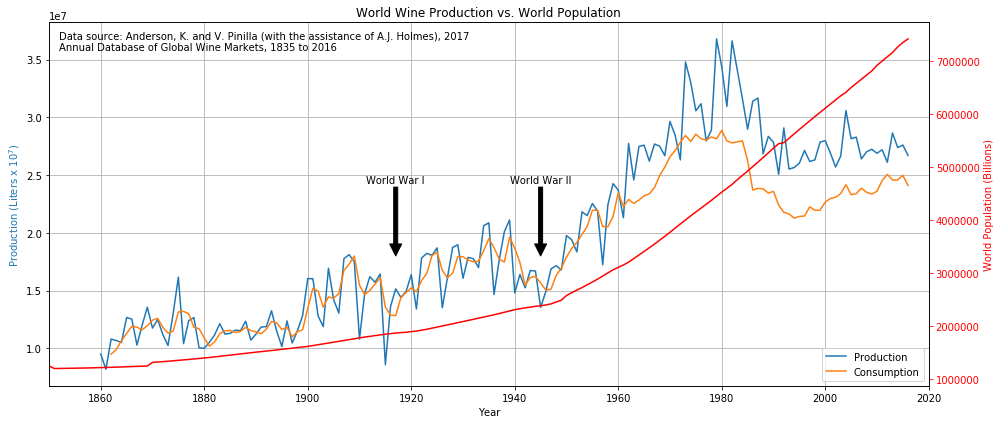

In [3]:
# --------------------------------------------------------------------
# Plotting World Production and World population 1850-2016 using twinx
# --------------------------------------------------------------------

# World production in volume

# Main plot: global production and consumption
fig, ax1 = plt.subplots(figsize=(14,6))
# Production
years = T6_df.Year
prod = T6_df.World # World column has the total
# Consumption
cons = T34_df.World

ax1.plot(years,prod, color='#1f77b4')
ax1.plot(years,cons, color='#ff7f0e')
ax1.grid()
# Arrows 
ax1.annotate('World War I', xy=(1917, 18000000), xycoords='data', xytext=(1917, 25000000), textcoords='data',
            arrowprops=dict(facecolor='black', shrink=1),
            horizontalalignment='center', verticalalignment='top',)
ax1.annotate('World War II', xy=(1945, 18000000), xycoords='data', xytext=(1945, 25000000), textcoords='data',
            arrowprops=dict(facecolor='black', shrink=1),
            horizontalalignment='center', verticalalignment='top',)
# Labels
ax1.set_xlabel('Year')
ax1.set_ylabel('Production (Liters x $10^7$)', color='#1f77b4')

plt.legend(["Production","Consumption"],loc="lower right")
# World population
pyears=T58_df.Year
population = T58_df.World
# twinx allows to add data to the main plot, with the same x, but a different y scale
ax2 = ax1.twinx()
ax2.plot(pyears,population, color='r')
ax2.set_ylabel('World Population (Billions)', color='r')
ax2.tick_params('y', colors='r')

# Final plot title and x adjustment
plt.title("World Wine Production vs. World Population")
plt.xlim(left = 1850, right=2020)
# Required acknowledgement to the source
plt.text(1852,7200000,"Data source: Anderson, K. and V. Pinilla (with the assistance of A.J. Holmes), 2017\nAnnual Database of Global Wine Markets, 1835 to 2016")

fig.tight_layout()

# Output plot file
plt.savefig("../reports/images/01 World Wine Production and Consumption vs World Population.png",bbox_inches="tight")

plt.show()

In [6]:
T6_df.columns

Index(['Year', 'France', 'Italy', 'Portugal', 'Spain', 'Austria', 'Bel-Lux',
       'Denmark', 'Finland', 'Germany', 'Greece', 'Ireland', 'Netherlands',
       'Sweden', 'Switzerland', 'United Kingdom', 'Other WEM', 'Bulgaria',
       'Croatia', 'Georgia', 'Hungary', 'Moldova', 'Romania', 'Russia',
       'Ukraine', 'Other ECA', 'Australia', 'New Zealand', 'Canada',
       'United States', 'Argentina', 'Brazil', 'Chile', 'Mexico', 'Uruguay',
       'Other LAC', 'Algeria', 'Morocco', 'South Africa', 'Tunisia', 'Turkey',
       'Other AME', 'China', 'Hong Kong', 'India', 'Japan', 'Korea',
       'Malaysia', 'Philippines', 'Singapore', 'Taiwan', 'Thailand',
       'Other Asia Pacific', 'Other', 'World', 'Unnamed: 55',
       'Coeff. of variation'],
      dtype='object')

In [4]:
# Top producers in 2016

T6_2016_se = T6_df.iloc[181,1:52] # Row 181 is 2016. Cols 1-52 are year and countries. 
T6_2016_df = pd.DataFrame({'Country':T6_2016_se.index,'Production':T6_2016_se.values})
T6_2016_df = T6_2016_df.dropna(how='any') # dropping countries without data or production in 2016
T6_2016_df = T6_2016_df.set_index('Country')
T6_2016_df = T6_2016_df.sort_values("Production", ascending=False)
T6_2016_df.head(10)

,Production
Country,
Italy,5.090000e+06
France,4.350000e+06
Spain,3.930000e+06
United States,3.150000e+06
Australia,1.310000e+06
South Africa,1.053100e+06
Chile,1.010000e+06
China,9.935628e+05
Argentina,9.400000e+05


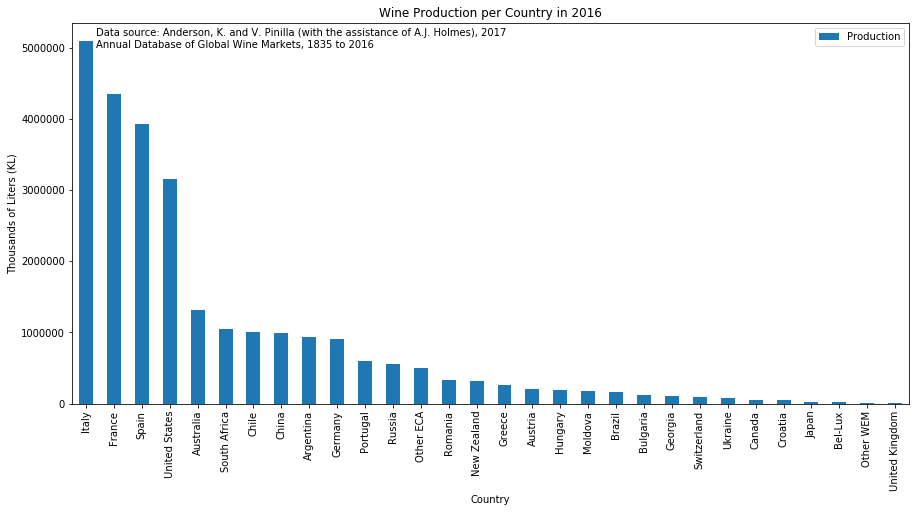

In [5]:
# plot sorted producers from highest to lowest
T6_2016_df.plot(kind="bar", figsize=(15,7))
# Final plot title and labels
plt.title("Wine Production per Country in 2016")
plt.ylabel("Thousands of Liters (KL)")
# Required acknowledgement to the source
plt.text(0.35,5000000,"Data source: Anderson, K. and V. Pinilla (with the assistance of A.J. Holmes), 2017\nAnnual Database of Global Wine Markets, 1835 to 2016")

fig.tight_layout()

# Output plot file
plt.savefig("../reports/images/02 Wine Production per Country in 2016.png",bbox_inches="tight")

plt.show()

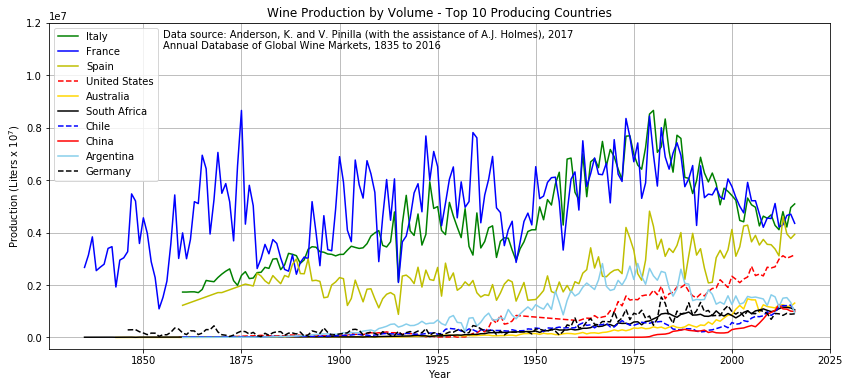

In [6]:
# Comparison of historical Wine Production for the top 10 producers

years6 = T6_df.Year
#prodww = T6_df.World
prodIT = T6_df.Italy
prodFR = T6_df.France
prodES = T6_df.Spain
prodUS = T6_df['United States']
prodAU = T6_df.Australia
prodZA = T6_df['South Africa']
prodCL = T6_df.Chile
prodCN = T6_df.China
prodAR = T6_df.Argentina
prodDE = T6_df.Germany

plt.figure(figsize=(14,6))
plt.grid()
#plt.plot(years,prodww)
plt.plot(years6,prodIT, color='g')
plt.plot(years6,prodFR, color='b')
plt.plot(years6,prodES, color='y')
plt.plot(years6,prodUS, color='r', linestyle='--')
plt.plot(years6,prodAU, color='gold')
plt.plot(years6,prodZA, color='k')
plt.plot(years6,prodCL, color='b', linestyle='--')
plt.plot(years6,prodCN, color='r')
plt.plot(years6,prodAR, color='skyblue')
plt.plot(years6,prodDE, color='k', linestyle='--')

plt.ylim(top=12000000)
plt.title("Wine Production by Volume - Top 10 Producing Countries")
plt.xlabel("Year")
plt.ylabel('Production (Liters x $10^7$)')
plt.text(1855,11000000,"Data source: Anderson, K. and V. Pinilla (with the assistance of A.J. Holmes), 2017\nAnnual Database of Global Wine Markets, 1835 to 2016")
plt.legend()

# Output plot file
plt.savefig("../reports/images/03 Wine Production by Volume - Top 10 Producing Countries.png",bbox_inches="tight")

plt.show()

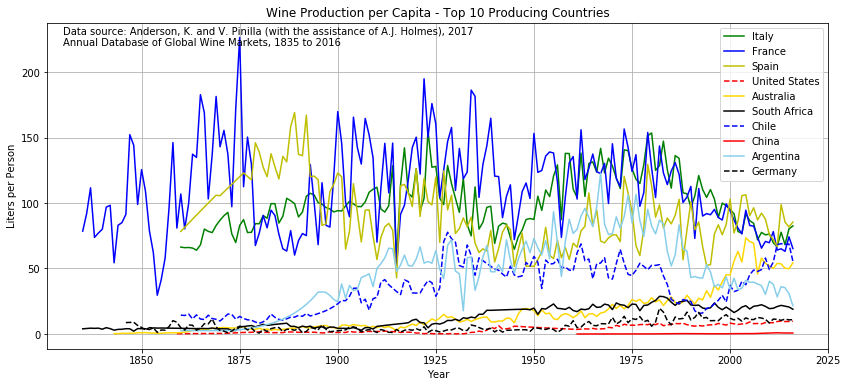

In [7]:
# Comparison of Wine Production per Capita for top producers

years8 = T8_df.Year
#prodpcww = T8_df.World
prodpcIT = T8_df.Italy
prodpcFR = T8_df.France
prodpcES = T8_df.Spain
prodpcUS = T8_df['United States']
prodpcAU = T8_df.Australia
prodpcZA = T8_df['South Africa']
prodpcCL = T8_df.Chile
prodpcCN = T8_df.China
prodpcAR = T8_df.Argentina
prodpcDE = T8_df.Germany

plt.figure(figsize=(14,6))
plt.grid()
#plt.plot(years,prodpcww)
plt.plot(years8,prodpcIT, color='g')
plt.plot(years8,prodpcFR, color='b')
plt.plot(years8,prodpcES, color='y')
plt.plot(years8,prodpcUS, color='r', linestyle='--')
plt.plot(years8,prodpcAU, color='gold')
plt.plot(years8,prodpcZA, color='k')
plt.plot(years8,prodpcCL, color='b', linestyle='--')
plt.plot(years8,prodpcCN, color='r')
plt.plot(years8,prodpcAR, color='skyblue')
plt.plot(years8,prodpcDE, color='k', linestyle='--')

plt.title("Wine Production per Capita - Top 10 Producing Countries")
plt.xlabel("Year")
plt.ylabel("Liters per Person")
plt.text(1830,220,"Data source: Anderson, K. and V. Pinilla (with the assistance of A.J. Holmes), 2017\nAnnual Database of Global Wine Markets, 1835 to 2016")
plt.legend()

# Output plot file
plt.savefig("../reports/images/04 Wine Production per Capita - Top 10 Producing Countries.png",bbox_inches="tight")

plt.show()

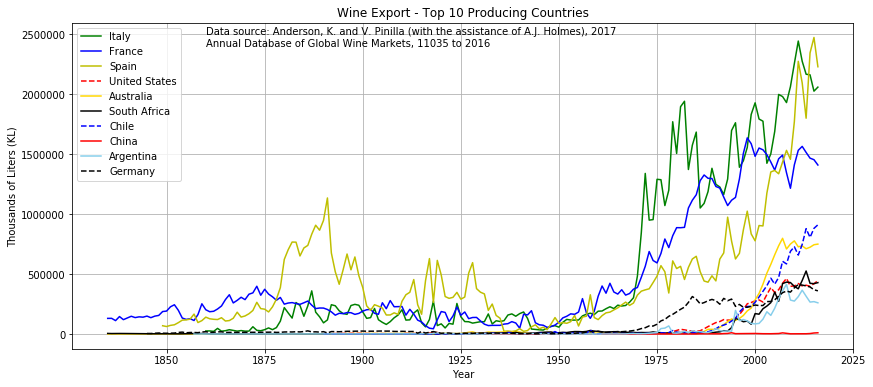

In [8]:
# Comparison of Wine Export Volumes for the top 10 producers

years10 = T10_df.Year
#expoww = T10_df.World
expoIT = T10_df.Italy
expoFR = T10_df.France
expoES = T10_df.Spain
expoUS = T10_df['United States']
expoAU = T10_df.Australia
expoZA = T10_df['South Africa']
expoCL = T10_df.Chile
expoCN = T10_df.China
expoAR = T10_df.Argentina
expoDE = T10_df.Germany

plt.figure(figsize=(14,6))
plt.grid()
#plt.plot(years,expoww)
plt.plot(years10,expoIT, color='g')
plt.plot(years10,expoFR, color='b')
plt.plot(years10,expoES, color='y')
plt.plot(years10,expoUS, color='r', linestyle='--')
plt.plot(years10,expoAU, color='gold')
plt.plot(years10,expoZA, color='k')
plt.plot(years10,expoCL, color='b', linestyle='--')
plt.plot(years10,expoCN, color='r')
plt.plot(years10,expoAR, color='skyblue')
plt.plot(years10,expoDE, color='k', linestyle='--')

plt.title("Wine Export - Top 10 Producing Countries")
plt.xlabel("Year")
plt.ylabel("Thousands of Liters (KL)")
plt.text(1860,2400000,"Data source: Anderson, K. and V. Pinilla (with the assistance of A.J. Holmes), 2017\nAnnual Database of Global Wine Markets, 11035 to 2016")
plt.legend()

# Output plot file
plt.savefig("../reports/images/05 Wine Export - Top 10 Producing Countries.png",bbox_inches="tight")

plt.show()

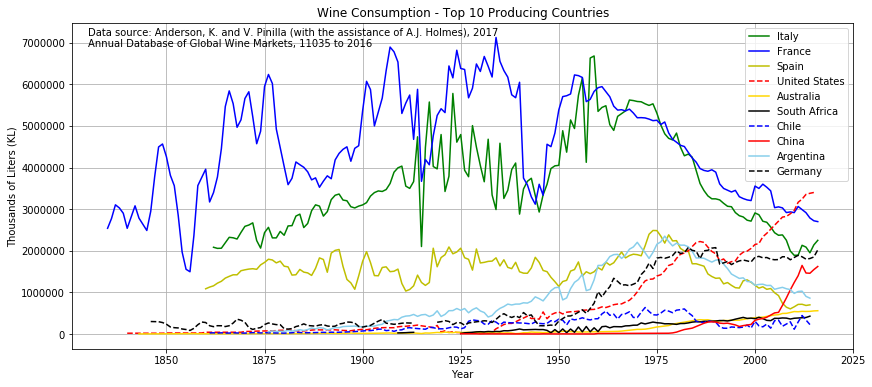

In [9]:
# Comparison of Wine Consumption for the top 10 producers

years34 = T34_df.Year
#consww = T34_df.World
consIT = T34_df.Italy
consFR = T34_df.France
consES = T34_df.Spain
consUS = T34_df['United States']
consAU = T34_df.Australia
consZA = T34_df['South Africa']
consCL = T34_df.Chile
consCN = T34_df.China
consAR = T34_df.Argentina
consDE = T34_df.Germany

plt.figure(figsize=(14,6))
plt.grid()
#plt.plot(years,consww)
plt.plot(years34,consIT, color='g')
plt.plot(years34,consFR, color='b')
plt.plot(years34,consES, color='y')
plt.plot(years34,consUS, color='r', linestyle='--')
plt.plot(years34,consAU, color='gold')
plt.plot(years34,consZA, color='k')
plt.plot(years34,consCL, color='b', linestyle='--')
plt.plot(years34,consCN, color='r')
plt.plot(years34,consAR, color='skyblue')
plt.plot(years34,consDE, color='k', linestyle='--')

plt.title("Wine Consumption - Top 10 Producing Countries")
plt.xlabel("Year")
plt.ylabel('Thousands of Liters (KL)')
plt.text(1830,6900000,"Data source: Anderson, K. and V. Pinilla (with the assistance of A.J. Holmes), 2017\nAnnual Database of Global Wine Markets, 11035 to 2016")
plt.legend()

# Output plot file
plt.savefig("../reports/images/06 Wine Consumption - Top 10 Producing Countries.png",bbox_inches="tight")

plt.show()

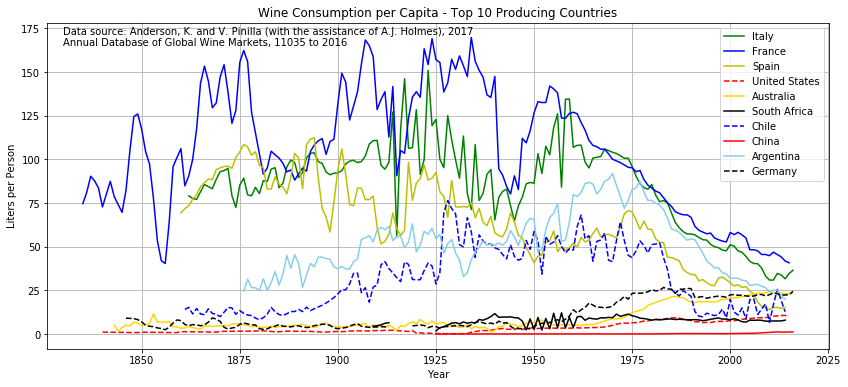

In [16]:
# Comparison of Wine Consumption per Capita for the top 10 producers

years38 = T38_df.Year
#conspcww = T38_df.World
conspcIT = T38_df.Italy
conspcFR = T38_df.France
conspcES = T38_df.Spain
conspcUS = T38_df['United States']
conspcAU = T38_df.Australia
conspcZA = T38_df['South Africa']
conspcCL = T38_df.Chile
conspcCN = T38_df.China
conspcAR = T38_df.Argentina
conspcDE = T38_df.Germany

plt.figure(figsize=(14,6))
plt.grid()
#plt.plot(years,conspcww)
plt.plot(years38,conspcIT, color='g')
plt.plot(years38,conspcFR, color='b')
plt.plot(years38,conspcES, color='y')
plt.plot(years38,conspcUS, color='r', linestyle='--')
plt.plot(years38,conspcAU, color='gold')
plt.plot(years38,conspcZA, color='k')
plt.plot(years38,conspcCL, color='b', linestyle='--')
plt.plot(years38,conspcCN, color='r')
plt.plot(years38,conspcAR, color='skyblue')
plt.plot(years38,conspcDE, color='k', linestyle='--')

plt.title("Wine Consumption per Capita - Top 10 Producing Countries")
plt.xlabel("Year")
plt.ylabel('Liters per Person')
plt.text(1830,165,"Data source: Anderson, K. and V. Pinilla (with the assistance of A.J. Holmes), 2017\nAnnual Database of Global Wine Markets, 11035 to 2016")
plt.legend()

# Output plot file
plt.savefig("../reports/images/07 Wine Consumption per Capita - Top 10 Producing Countries.png",bbox_inches="tight")

plt.show()

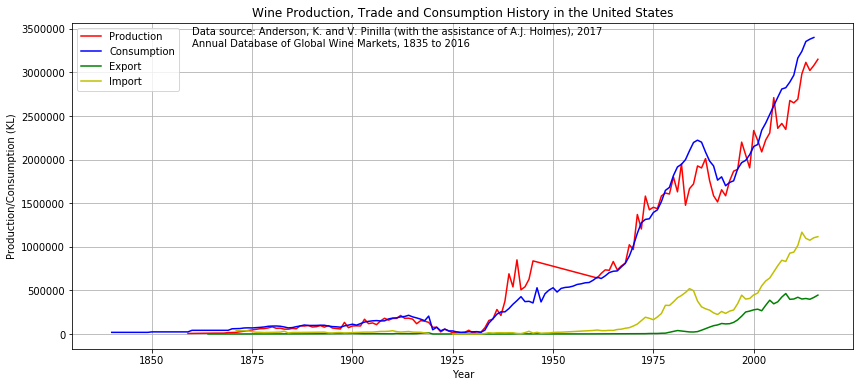

In [17]:
# =============
# = US only:  =
# =============

# Production and Consumption History
years6 = T6_df.Year
prodUS = T6_df['United States']
consUS = T34_df['United States']
expoUS = T10_df['United States']
impoUS = T15_df['United States']


plt.figure(figsize=(14,6))
plt.grid()

plt.plot(years6,prodUS, color='r')
plt.plot(years6,consUS, color='b')
plt.plot(years6,expoUS, color='g')
plt.plot(years6,impoUS, color='y')

plt.legend(["Production","Consumption","Export","Import"])

#plt.ylim(top=12000000)
plt.title("Wine Production, Trade and Consumption History in the United States")
plt.xlabel("Year")
plt.ylabel('Production/Consumption (KL)')
plt.text(1860,3300000,"Data source: Anderson, K. and V. Pinilla (with the assistance of A.J. Holmes), 2017\nAnnual Database of Global Wine Markets, 1835 to 2016")

# Output plot file
plt.savefig("../reports/images/08 Wine Production Trade and Consumption History in the US.png",bbox_inches="tight")

plt.show()